Нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. 

In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = fetch_california_housing(as_frame=True)
features = data.data
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
target = data.target
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
def get_rmse_r2(features=None, target=None):
  if features is None or target is None:
    return 'Insert features and target dataframe'

  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return  f'RMSE: {rmse}, r2: {r2}'

In [ ]:
simple_rmse_r2 = get_rmse_r2(features=features, target=target)
simple_rmse_r2

'RMSE: 0.5411287478470685, r2: 0.5910509795491354'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


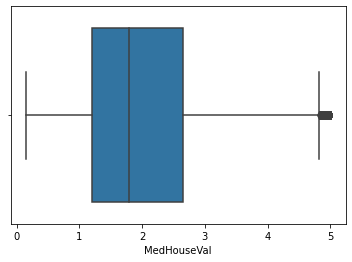

In [ ]:
sns.boxplot(target)
# На графике целевой переменной видим, что как таковых ярко выраженных выбросов нет.

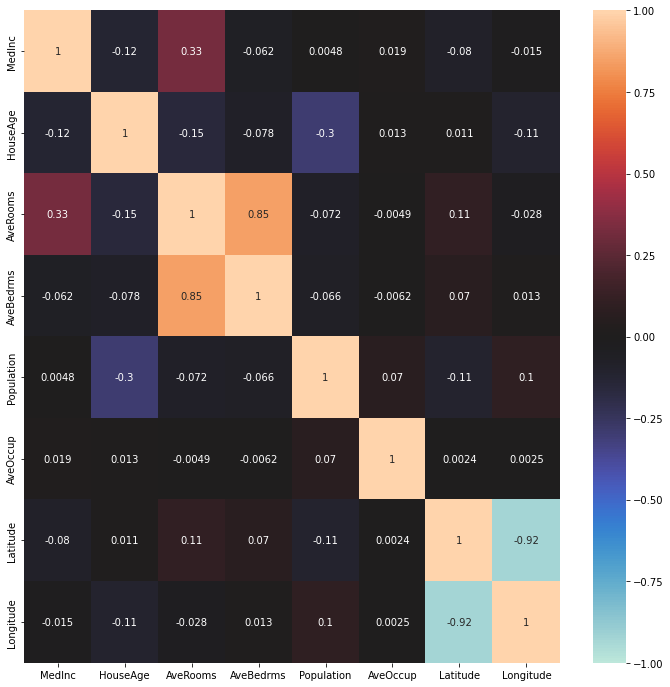

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(features.corr(), vmin=-1, vmax=1, center=0, annot=True)
# Попробуем удалить сильно коррелирующеи признаки, например количество ванных комнат и широту

In [ ]:
deleted_features_rmse_r2 = get_rmse_r2(features[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude']], target)
deleted_features_rmse_r2

'RMSE: 0.6343277718913579, r2: 0.5206173724980825'

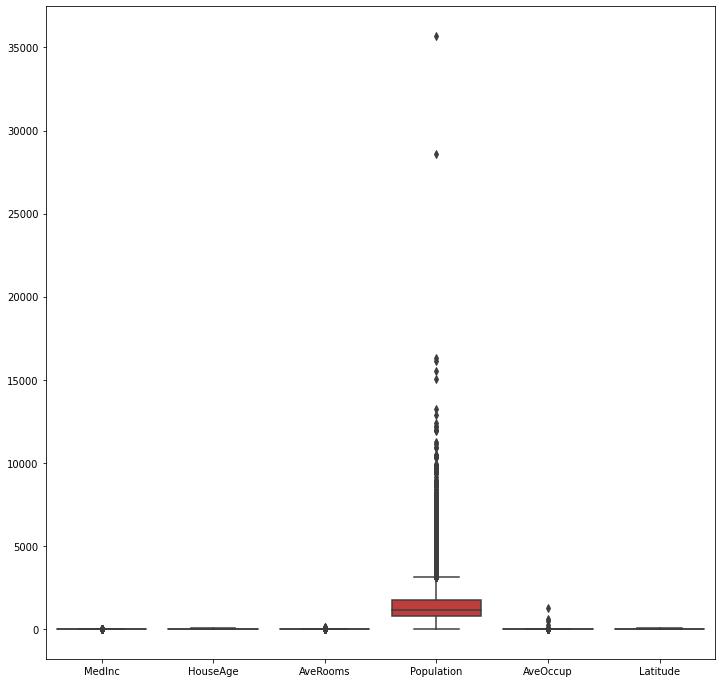

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=features[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude']])
# Получаем огромные выбросы в столбце популяции, выбросим их и построим боксплот снова

In [ ]:
new_df = pd.concat([features, target], axis=1)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


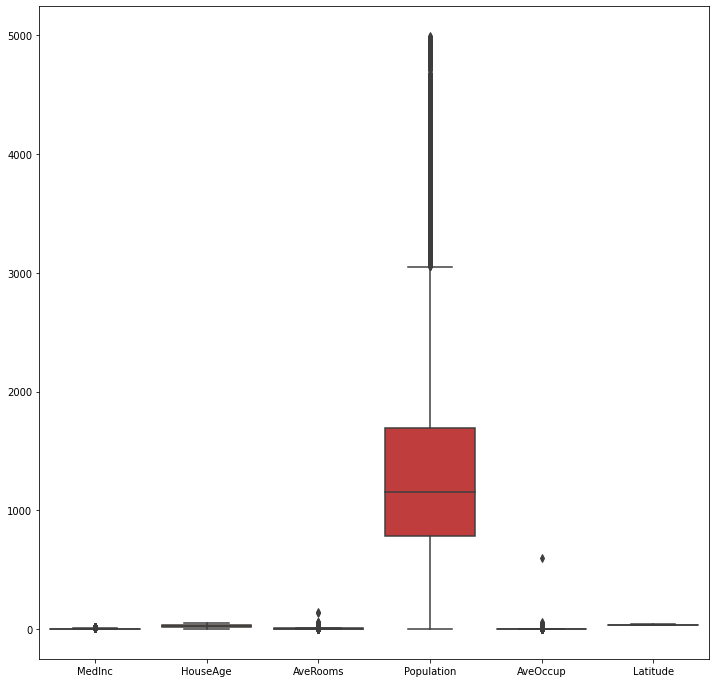

In [ ]:
# Попробуем сначала убрать все, что больше 5000
new_df = new_df.loc[features['Population'] < 5000]
plt.figure(figsize=(12,12))
sns.boxplot(data=new_df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude']])
# В целом устраивает

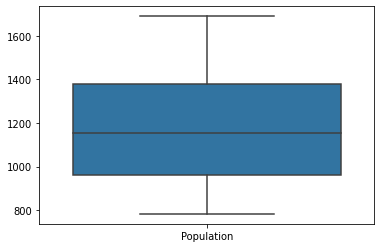

In [ ]:
Q1_population = new_df['Population'].quantile(0.25)
Q3_population = new_df['Population'].quantile(0.75)
new_df = new_df[(new_df['Population'] > Q1_population) & (new_df['Population'] < Q3_population)]
sns.boxplot(data=new_df[['Population']])
# Если пробовать по квантилям 25 и 27, то слишком мало строчек останется для модели, попробуем обучиться

In [ ]:
drop_big_values_df = get_rmse_r2(new_df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude']], new_df['MedHouseVal'])
drop_big_values_df

'RMSE: 0.6250558932232375, r2: 0.5254828414320698'

In [ ]:
# Создадим словарь для складирования результата
rmse_r2 = {'simple': simple_rmse_r2,
           'deleted_features': deleted_features_rmse_r2,
           'drop_big_values': drop_big_values_df}

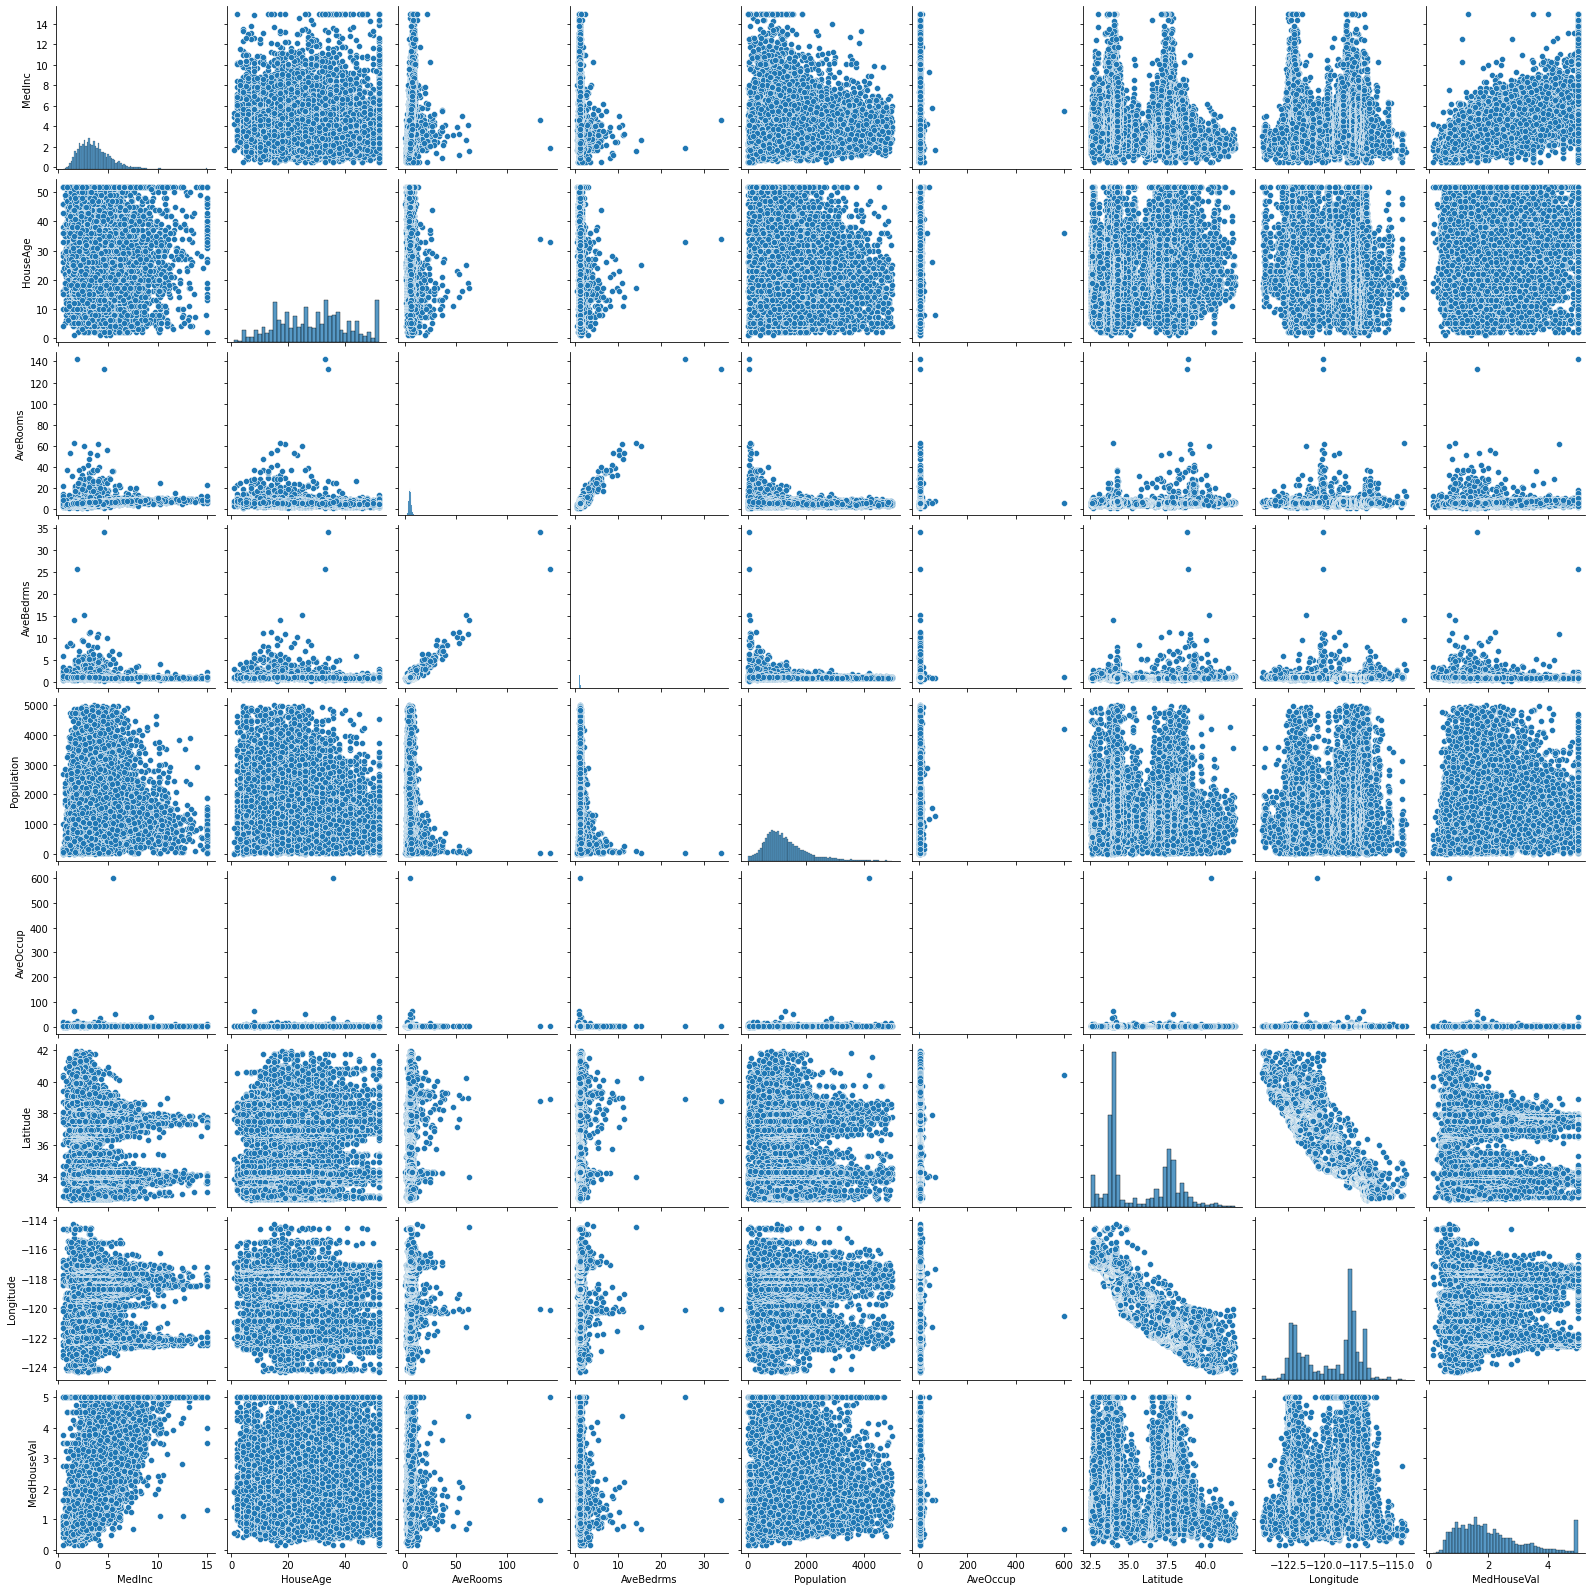

In [ ]:
# Посмотрим на общую визуализацию распределения данных
sns.pairplot(new_df)

In [ ]:
new_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Попробуем применить логарифм к AveRooms, возвести в квадрат MedInc и извлечь корень из Population
new_df['MedInc'] = new_df['MedInc'] ** 2
new_df['AveRooms'] = np.log(new_df['AveRooms'])
new_df['Population'] = np.sqrt(new_df['Population'])

In [ ]:
new_df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,69.308955,41.0,1.943640,1.023810,17.944358,2.555556,37.88,-122.23,4.526
1,68.913242,21.0,1.830682,0.971880,49.000000,2.109842,37.86,-122.22,3.585
2,52.669855,52.0,2.114825,1.073446,22.271057,2.802260,37.85,-122.24,3.521
3,31.844578,52.0,1.760845,1.073059,23.622024,2.547945,37.85,-122.25,3.413
4,14.793254,52.0,1.837665,1.081081,23.769729,2.181467,37.85,-122.25,3.422


In [ ]:
math_rmse_r2_ = get_rmse_r2(new_df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude']], new_df['MedHouseVal'])
rmse_r2['math_rmse_r2_'] = math_rmse_r2_
rmse_r2

{'simple': 'RMSE: 0.5411287478470685, r2: 0.5910509795491354',
 'deleted_features': 'RMSE: 0.6343277718913579, r2: 0.5206173724980825',
 'drop_big_values': 'RMSE: 0.6250558932232375, r2: 0.5254828414320698',
 'math_rmse_r2_': 'RMSE: 0.757880482186446, r2: 0.42724447362650864'}